In [8]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

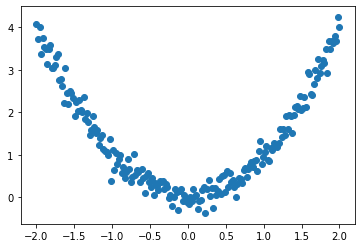

In [9]:
x_data = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data,y_data)
plt.show()

In [10]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [11]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [12]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression,self).__init__()
        # 1-10-10-1
        self.fc = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)
        
    # 定义网络计算
    def forward(self,x):
        x = self.fc(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [13]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(),lr=0.3)

In [14]:
for name, parameters in model.named_parameters():
    print('name:{},param:{}'.format(name,parameters))

name:fc.weight,param:Parameter containing:
tensor([[-0.3747],
        [ 0.0760],
        [ 0.2785],
        [ 0.9145],
        [ 0.5412],
        [-0.4445],
        [ 0.0894],
        [-0.7677],
        [ 0.7139],
        [ 0.5537]], requires_grad=True)
name:fc.bias,param:Parameter containing:
tensor([-0.4148,  0.9060, -0.7973, -0.8394, -0.3511, -0.6723,  0.0271,  0.6725,
        -0.1014, -0.2413], requires_grad=True)
name:fc2.weight,param:Parameter containing:
tensor([[ 0.1716, -0.1257, -0.0982, -0.1227, -0.2338,  0.1270, -0.1237, -0.0095,
          0.2465,  0.2103]], requires_grad=True)
name:fc2.bias,param:Parameter containing:
tensor([-0.0854], requires_grad=True)


In [ ]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out,target)
    # 梯度清零
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

In [1]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()

NameError: name 'model' is not defined